In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
card_res=pd.read_csv("CARD_SPENDING_RESIDENT.txt", sep="\t")
card_resident=pd.DataFrame(card_res)
card_resident

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


In [43]:
card_2019=card_resident[card_resident['STD_DD']<20200000]

In [42]:
card_2020=card_resident[card_resident['STD_DD']>20200000]

In [3]:
date=card_resident['STD_DD'].unique()
date

array([20190201, 20190202, 20190203, 20190204, 20190205, 20190206,
       20190207, 20190208, 20190209, 20190210, 20190211, 20190212,
       20190213, 20190214, 20190215, 20190216, 20190217, 20190218,
       20190219, 20190220, 20190221, 20190222, 20190223, 20190224,
       20190225, 20190226, 20190227, 20190228, 20190301, 20190302,
       20190303, 20190304, 20190305, 20190306, 20190307, 20190308,
       20190309, 20190310, 20190311, 20190312, 20190313, 20190314,
       20190315, 20190316, 20190317, 20190318, 20190319, 20190320,
       20190321, 20190322, 20190323, 20190324, 20190325, 20190326,
       20190327, 20190328, 20190329, 20190330, 20190331, 20190401,
       20190402, 20190403, 20190404, 20190405, 20190406, 20190407,
       20190408, 20190409, 20190410, 20190411, 20190412, 20190413,
       20190414, 20190415, 20190416, 20190417, 20190418, 20190419,
       20190420, 20190421, 20190422, 20190423, 20190424, 20190425,
       20190426, 20190427, 20190428, 20190429, 20190430, 20190

In [4]:
gu=card_resident['GU_CD'].unique()
gu_name=['대구 중구 ', '서울 중구 ', '대구 수성구 ', '서울 노원구 ']
gu

array([110, 140, 260, 350], dtype=int64)

In [46]:
E_2019=card_2019.groupby(['GU_CD','MCT_CAT_CD'])
category_2019=E_2019.sum()
category_2019

STD_DD   DONG_CD   AGE_CD   USE_CNT    USE_AMT
GU_CD MCT_CAT_CD                                                      
110   10           80923006686   2245741   143875     46743    2828123
      20          104727458506   2974013   214375    128669   10415621
      21          152477641921   4458415   274045    208437    3667530
      22          163299716182   4792764   327410    233683    4576481
      30            5673489668    164387    12215      1608     836582
...                        ...       ...      ...       ...        ...
350   70          832368213584  26008842  1759350   3465828  145143721
      71          786919652691  24675270  1641010    897470   30689201
      80          916521610752  28774380  1926015  10604142  188772809
      81          885529432873  27730331  1866285   1932153   24935417
      92          326397660641  10130781   681145    140959    3101231

[92 rows x 5 columns]

In [45]:
E_2020=card_2020.groupby(['GU_CD','MCT_CAT_CD'])
category_2020=E_2020.sum()
category_2020

STD_DD   DONG_CD   AGE_CD  USE_CNT    USE_AMT
GU_CD MCT_CAT_CD                                                     
110   10           53046153258   1478413    98075    22806    1841146
      20           86881855039   2450789   175010    81965    6771614
      21          129181362419   3747400   229895   158756    2328274
      22          120677071072   3526545   236970    77993    2576290
      30            4221881683    119228     9975     1093     493750
...                        ...       ...      ...      ...        ...
350   70          854717992886  26683345  1806515  3595320  135744886
      71          739636527342  23182064  1558350   652863   25487624
      80          923964818141  28988916  1940470  9361391  166868572
      81          904006858780  28333551  1908750  1921431   27840796
      92          317711519395   9882517   674240   137517    3373810

[92 rows x 5 columns]

In [59]:
for i in range(4):
    for j in range(12):
        try:
            plt.rcParams['figure.figsize']=[5,5]
            area_2019=category_2019.loc[(gu[i], cat[j])]
            area_2020=category_2020.loc[(gu[i], cat[j])]
            print(gu[i], cat[j])
            budget_data=[area_2019['USE_CNT'], area_2020['USE_CNT']]
            budget_category=['2019 USE_COUNT', '2020 USE_COUNT']
            colors=['pink', 'red']
            #area['USE_CNT'].plot.bar(color='red')
            #plt.xlabel('2019_2020')
            #plt.ylabel(gu_name[i], category_name[j])
            #plt.grid()
            #plt.legend()
            plt.pie(budget_data, labels=budget_category, autopct='%0.1f%%', colors=colors)
            #plt.legend(budget_category)
            #plt.show()
            plt.savefig(gu_name[i]+category_name[j]+' 이용건수 비율'+'.png')
            plt.close()
        except:
            pass

110 30
110 32
110 34
110 35
110 40
110 42
110 43
110 44
110 50
110 71
110 80
110 81
140 30
140 32
140 34
140 35
140 40
140 42
140 43
140 44
140 50
140 71
140 80
140 81
260 30
260 32
260 34
260 35
260 40
260 42
260 43
260 44
260 50
260 71
260 80
260 81
350 30
350 32
350 34
350 35
350 40
350 42
350 43
350 44
350 50
350 71
350 80
350 81


In [60]:
for i in range(4):
    for j in range(12):
        try:
            plt.rcParams['figure.figsize']=[5,5]
            area_2019=category_2019.loc[(gu[i], cat[j])]
            area_2020=category_2020.loc[(gu[i], cat[j])]
            print(gu[i], cat[j])
            budget_data=[area_2019['USE_AMT'], area_2020['USE_AMT']]
            budget_category=['2019 USE_AMOUNT', '2020 USE_AMOUNT']
            colors=['lightskyblue', 'blue']
            #area['USE_CNT'].plot.bar(color='red')
            #plt.xlabel('2019_2020')
            #plt.ylabel(gu_name[i], category_name[j])
            #plt.grid()
            #plt.legend()
            plt.pie(budget_data, labels=budget_category, autopct='%0.1f%%', colors=colors)
            #plt.legend(budget_category)
            #plt.show()
            plt.savefig(gu_name[i]+category_name[j]+' 이용금액 비율'+'.png')
            plt.close()
        except:
            pass

110 30
110 32
110 34
110 35
110 40
110 42
110 43
110 44
110 50
110 71
110 80
110 81
140 30
140 32
140 34
140 35
140 40
140 42
140 43
140 44
140 50
140 71
140 80
140 81
260 30
260 32
260 34
260 35
260 40
260 42
260 43
260 44
260 50
260 71
260 80
260 81
350 30
350 32
350 34
350 35
350 40
350 42
350 43
350 44
350 50
350 71
350 80
350 81


In [44]:
E=card_resident.groupby(['GU_CD','MCT_CAT_CD', 'STD_DD'])
category=E.sum()
category

DONG_CD  AGE_CD  USE_CNT  USE_AMT
GU_CD MCT_CAT_CD STD_DD                                     
110   10         20190201    18442    1150      411    28102
                 20190202    23404    1425      621    32089
                 20190203    20619    1315      580    29071
                 20190204    21431    1370      471    32279
                 20190205    15179     980      363    26977
...                            ...     ...      ...      ...
350   92         20200527   107319    7780     1747    40818
                 20200528   103876    7340     1267    52144
                 20200529    88587    6030     1112    26190
                 20200530   121328    8455     2047    48170
                 20200531    30716    2175      439    13837

[21730 rows x 4 columns]

In [6]:
cat=[30, 32, 34, 35, 40, 42, 43, 44, 50, 71, 80 ,81]
category_name=['가구', '주방용구', '광학제품', '가전', '유통업', '의복', '직물', '신변잡화', '서적문구', '보건위생', '요식업소', '음료식품']
len(cat)

12

In [55]:
for i in range(4):
    for j in range(12):
        try:
            plt.rcParams['figure.figsize']=[15,5]
            area=category.loc[(gu[i], cat[j])]
            print(gu[i], cat[j])
            area['USE_CNT'].plot.bar(color='red')
            #plt.xlabel('2019_2020')
            #plt.ylabel(gu_name[i], category_name[j])
            plt.grid()
            plt.legend()
            #plt.show()
            plt.savefig(gu_name[i]+category_name[j]+' 이용건수'+'.png')
            plt.close()
        except:
            pass

110 30
110 32
110 34
110 35
110 40
110 42
110 43
110 44
110 50
110 71
110 80
110 81
140 30
140 32
140 34
140 35
140 40
140 42
140 43
140 44
140 50
140 71
140 80
140 81
260 30
260 32
260 34
260 35
260 40
260 42
260 43
260 44
260 50
260 71
260 80
260 81
350 30
350 32
350 34
350 35
350 40
350 42
350 43
350 44
350 50
350 71
350 80
350 81


110 30
110 32
110 34
110 35
110 40
110 42
110 43
110 44
110 50
110 71
110 80
110 81
140 30
140 32
140 34
140 35
140 40
140 42
140 43
140 44
140 50
140 71
140 80
140 81
260 30
260 32
260 34
260 35
260 40
260 42
260 43
260 44
260 50
260 71
260 80
260 81
350 30
350 32
350 34
350 35
350 40
350 42
350 43
350 44
350 50
350 71
350 80
350 81


C:\Users\msi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49436 missing from current font.

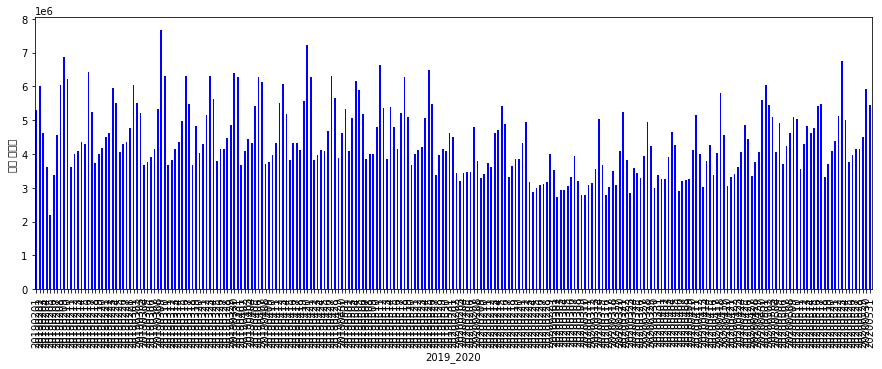

In [65]:
for i in range(4):
    for j in range(12):
        try:
            plt.rcParams['figure.figsize']=[15,5]
            area=category.loc[(gu[i], cat[j])]
            print(gu[i], cat[j])
            area['USE_AMT'].plot.bar(color='blue')
            #plt.xlabel('2019_2020')
            #plt.ylabel(gu_name[i], category_name[j])
            plt.grid()
            plt.legend()
            #plt.show()
            plt.savefig(gu_name[i]+category_name[j]+' 이용금액'+'.png')
            plt.close()
        except:
            pass